住宅情報の分析

【問題1】データセットの取得

In [2]:
# PandasのDataFrame型のtrain_dataに格納
import pandas as pd
import numpy as np

train_data=pd.read_csv("/Users/chidayasuhiro/diveintocode-ml/train.csv")

train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


【問題2】データセット自体の調査

目的変数含め80個の種類×1460のデータになっている。
価格などの数値のデータから、家のスタイルのカテゴリー、通りの情報など、
住宅に関する多岐にわたるデータのセットとなっている

【問題3】データの確認

各特徴量がどういったものかを見る

住宅のクラスであったり、住宅のキッチンの数、ガレージの位置など、住宅の価格を説明するための特徴量となっている

今回の目的変数はどの列か確認する

住宅の価格が目的変数であり、一番最後の列である
「SalePrice」がそれに該当する

In [3]:
#特徴量の平均値と標準偏差、四分位数を一度に表示させる

print(train_data.quantile([0.25,0.50,0.75]))
print(train_data.mean())
print(train_data.std())

           Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0.25   365.75        20.0         59.0   7553.5          5.0          5.0   
0.50   730.50        50.0         69.0   9478.5          6.0          5.0   
0.75  1095.25        70.0         80.0  11601.5          7.0          6.0   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0.25     1954.0        1967.0         0.0        0.00  ...         0.0   
0.50     1973.0        1994.0         0.0      383.50  ...         0.0   
0.75     2000.0        2004.0       166.0      712.25  ...       168.0   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0.25          0.0            0.0        0.0          0.0       0.0      0.0   
0.50         25.0            0.0        0.0          0.0       0.0      0.0   
0.75         68.0            0.0        0.0          0.0       0.0      0.0   

      MoSold  YrSold  SalePrice  
0.25     5.0  2007.0   129975.0  
0.50     

【問題4】欠損値への対応

In [7]:
# 各特徴量の欠損値の有無を確認する

train_data.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


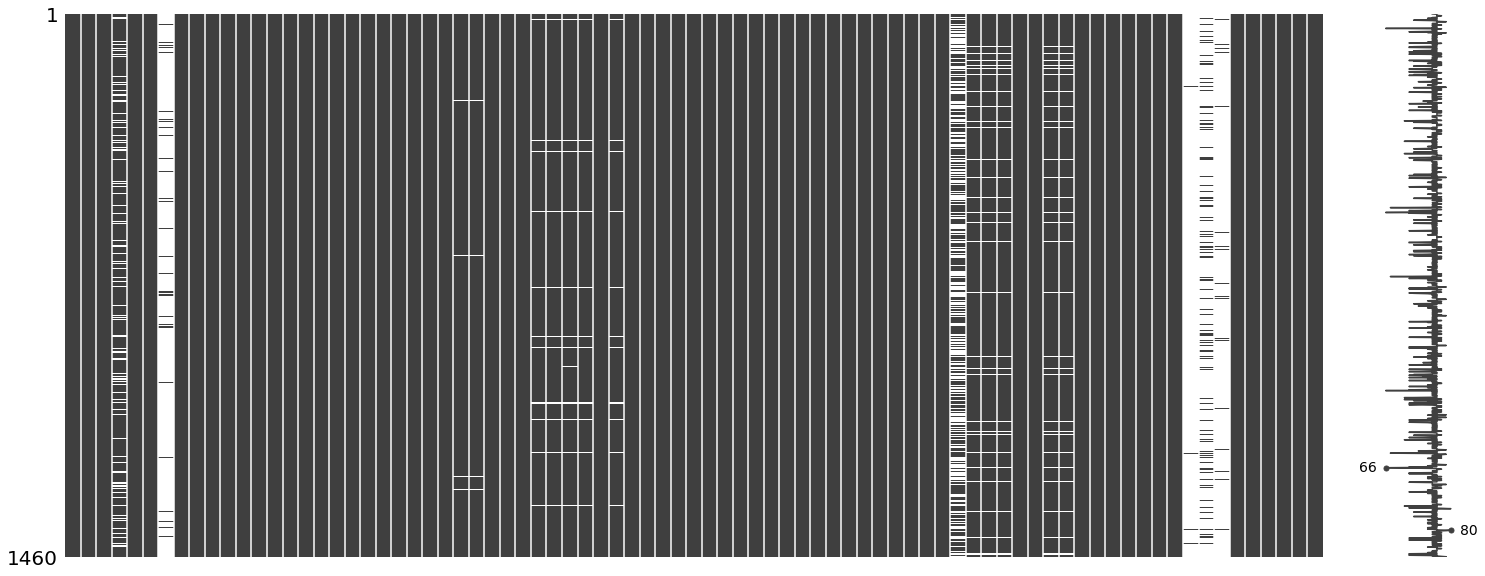

In [10]:
import missingno as msno
import pandas as pd

msno.matrix(train_data)

In [11]:
# 欠損値が何パーセント含まれるかを確認
# 列ごとに欠損値の数を確認

train_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [21]:
# 何パーセント欠損値があるか確認

chi=(sum(train_data.isnull().sum())/116800)*100

print("欠損値は約{:2f}パーセントある".format(chi))

欠損値は約5.963185パーセントある


In [24]:
# 5つ以上欠損値がある特徴量（列）は削除
# ５つ以上の欠損値のある列を調べ、まとめて削除する

train_data1=train_data.isnull().sum()>=5

# 欠損値が5つ以上ある列を判別するリストindexesを作る

train_data1
list1=[]
for i in range(len(train_data1)):
  if train_data1[i]==False:
    list1.append(0)
  else:
    list1.append(1)

indexes = [i for i, x in enumerate(list1) if x == 1]
print(indexes) 

[3, 6, 25, 26, 30, 31, 32, 33, 35, 57, 58, 59, 60, 63, 64, 72, 73, 74]


In [28]:
# ５つ以上欠損値があるものを除いたデータフレーム

train_data2=train_data.drop(train_data.columns[indexes], axis=1)

In [34]:
# 5つ以上欠損値がある特徴量を削除したデータから、欠損値があるサンプル（行）は削除

train_data3=train_data2.dropna(how="any")
train_data3

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


【問題5】用語の調査

尖度・・・分布が正規分布からどれだけ尖っているかを表す統計量

歪度・・・分布が正規分布からどれだけ歪んでいるかを表す統計量

【問題6】分布の確認

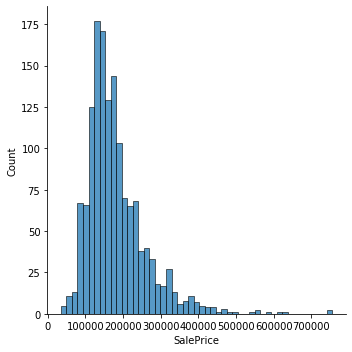

In [40]:
# seabornのsns.displot()やsns.histplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する
import seaborn as sns
import matplotlib.pyplot as plt
target1=train_data3["SalePrice"]
sns.displot(target1)
plt.show()

In [43]:
import numpy as np
import scipy

# 歪度
waido = scipy.stats.skew(target1)
# 尖度
sendo = scipy.stats.kurtosis(target1)

print(waido)
print(sendo)

1.880007613681095
6.502799105301849


In [48]:
#　対数変換

target_e=np.log(target1)

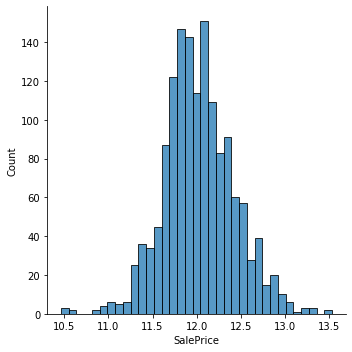

In [49]:
# 対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出

sns.displot(target_e)
plt.show()

In [50]:
# 歪度
waido2 = scipy.stats.skew(target_e)
# 尖度
sendo2 = scipy.stats.kurtosis(target_e)

print(waido2)
print(sendo2)

0.12119299622459463
0.8000555650770789


対数変換の前後での変化を「正規分布」という言葉を含めて説明

対数に変換することで、歪度と尖度に変化が見られ、正規分布にかなり近いグラフへの変化が見られた

【問題7】相関係数の確認

In [58]:
# 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける
# 相関係数行列の作成
train_data_co=train_data3.corr()
train_data_co

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.010589,-0.033170,-0.027553,0.013167,-0.013945,-0.023158,-0.004001,-0.005668,-0.007508,...,-0.029716,0.000267,0.003272,-0.046550,0.001617,0.057163,-0.006155,0.021708,0.000566,-0.021756
MSSubClass,0.010589,1.000000,-0.139766,0.032936,-0.059134,0.027435,0.040199,-0.069501,-0.065549,-0.140627,...,-0.012598,-0.005838,-0.011904,-0.043786,-0.025932,0.008309,-0.007651,-0.013404,-0.021461,-0.084230
LotArea,-0.033170,-0.139766,1.000000,0.105786,-0.005665,0.014296,0.013852,0.214121,0.111158,-0.002641,...,0.171701,0.084751,-0.018360,0.020417,0.043147,0.077669,0.038063,0.001179,-0.014254,0.263837
OverallQual,-0.027553,0.032936,0.105786,1.000000,-0.092243,0.573334,0.551605,0.239265,-0.059291,0.308018,...,0.239000,0.308554,-0.114162,0.030314,0.064755,0.065143,-0.031461,0.070570,-0.027277,0.791069
OverallCond,0.013167,-0.059134,-0.005665,-0.092243,1.000000,-0.375780,0.074158,-0.046595,0.040132,-0.137008,...,-0.003318,-0.032847,0.070238,0.025465,0.054721,-0.002009,0.068752,-0.003685,0.044003,-0.077924
YearBuilt,-0.013945,0.027435,0.014296,0.573334,-0.375780,1.000000,0.592512,0.250465,-0.048903,0.149444,...,0.224946,0.189359,-0.387177,0.031461,-0.050175,0.005006,-0.034330,0.012791,-0.013733,0.523273
YearRemodAdd,-0.023158,0.040199,0.013852,0.551605,0.074158,0.592512,1.000000,0.129259,-0.067575,0.181520,...,0.205773,0.226944,-0.193740,0.045389,-0.038558,0.005882,-0.010226,0.021860,0.035656,0.507430
BsmtFinSF1,-0.004001,-0.069501,0.214121,0.239265,-0.046595,0.250465,0.129259,1.000000,-0.050328,-0.495718,...,0.204403,0.111346,-0.102581,0.026382,0.061862,0.140491,0.003514,-0.016060,0.014456,0.386436
BsmtFinSF2,-0.005668,-0.065549,0.111158,-0.059291,0.040132,-0.048903,-0.067575,-0.050328,1.000000,-0.209395,...,0.067909,0.002954,0.036475,-0.030017,0.088823,0.041697,0.004923,-0.015309,0.031734,-0.011412
BsmtUnfSF,-0.007508,-0.140627,-0.002641,0.308018,-0.137008,0.149444,0.181520,-0.495718,-0.209395,1.000000,...,-0.005304,0.128835,-0.002640,0.020732,-0.012657,-0.035114,-0.023863,0.034754,-0.041221,0.214446


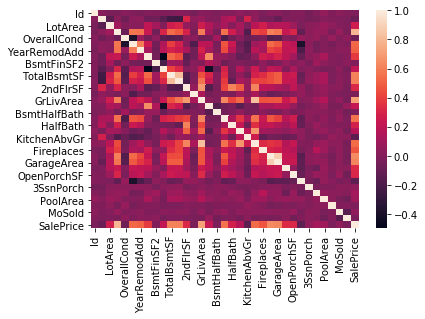

In [56]:
# ヒートマップ作成
# ヒートマップを見たところいくつか強い相関のものが見られる

sns.heatmap(train_data3.corr())
plt.show()

In [92]:
# 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る
#　負の相関は小さいようだったので、絶対値にする必要はなかった

train_data_cosp.sort_values()

KitchenAbvGr    -0.135935
EnclosedPorch   -0.128627
MSSubClass      -0.084230
OverallCond     -0.077924
YrSold          -0.028907
LowQualFinSF    -0.025620
Id              -0.021756
MiscVal         -0.021200
BsmtHalfBath    -0.016873
BsmtFinSF2      -0.011412
3SsnPorch        0.044571
MoSold           0.046380
PoolArea         0.092397
ScreenPorch      0.111419
BedroomAbvGr     0.168235
BsmtUnfSF        0.214446
BsmtFullBath     0.227082
LotArea          0.263837
HalfBath         0.284400
OpenPorchSF      0.315831
2ndFlrSF         0.319464
WoodDeckSF       0.324422
BsmtFinSF1       0.386436
Fireplaces       0.466968
YearRemodAdd     0.507430
YearBuilt        0.523273
TotRmsAbvGrd     0.533779
FullBath         0.560881
1stFlrSF         0.605968
TotalBsmtSF      0.613905
GarageArea       0.623423
GarageCars       0.640473
GrLivArea        0.708618
OverallQual      0.791069
SalePrice        1.000000
Name: SalePrice, dtype: float64

相関の高い１０個は以下の通りになる

YearRemodAdd     0.507430

YearBuilt        0.523273

TotRmsAbvGrd     0.533779

FullBath         0.560881

1stFlrSF         0.605968

TotalBsmtSF      0.613905

GarageArea       0.623423

GarageCars       0.640473

GrLivArea        0.708618

OverallQual      0.791069

In [100]:
# 相関係数行列とヒートマップを作る

train_data3_top10=train_data3.loc[:,["YearRemodAdd","YearBuilt","TotRmsAbvGrd","FullBath","1stFlrSF","TotalBsmtSF","GarageArea","GarageCars","GrLivArea","OverallQual"]]

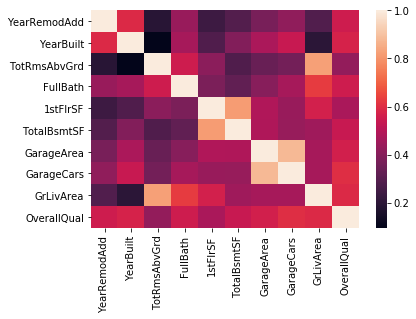

In [101]:
sns.heatmap(train_data3_top10.corr())
plt.show()

選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる

"YearRemodAdd"  リフォームのデータ

"YearBuilt"　建てられた時のデータ　築●年

"TotRmsAbvGrd"　　地上の層部屋（バスルームを除く）

"FullBath"　　地上のバスルーム

"1stFlrSF"　　１Fの広さ

"TotalBsmtSF"　下部構造のトータルの広さ

"GarageArea"　　ガレージの広さ

"GarageCars"　　車庫のガレージの大きさ

"GrLivArea"　地上の生活エリアの広さ

"OverallQual"　全面的な資材と最終的な価値

In [105]:
# 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す

train_data3_top10.corr()

,YearRemodAdd,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual
YearRemodAdd,1.000000,0.592512,0.191603,0.438733,0.241344,0.292546,0.372012,0.420573,0.287677,0.551605
YearBuilt,0.592512,1.000000,0.095401,0.467960,0.283056,0.393159,0.479460,0.537866,0.199286,0.573334
TotRmsAbvGrd,0.191603,0.095401,1.000000,0.554759,0.409901,0.286125,0.337915,0.362248,0.825576,0.427720
FullBath,0.438733,0.467960,0.554759,1.000000,0.381438,0.324886,0.405944,0.469619,0.630283,0.551267
1stFlrSF,0.241344,0.283056,0.409901,0.381438,1.000000,0.819393,0.489741,0.439726,0.566084,0.475933
TotalBsmtSF,0.292546,0.393159,0.286125,0.324886,0.819393,1.000000,0.486719,0.435279,0.455001,0.537523
GarageArea,0.372012,0.479460,0.337915,0.405944,0.489741,0.486719,1.000000,0.882613,0.468971,0.561980
GarageCars,0.420573,0.537866,0.362248,0.469619,0.439726,0.435279,0.882613,1.000000,0.467321,0.600991
GrLivArea,0.287677,0.199286,0.825576,0.630283,0.566084,0.455001,0.468971,0.467321,1.000000,0.593021
OverallQual,0.551605,0.573334,0.427720,0.551267,0.475933,0.537523,0.561980,0.600991,0.593021,1.000000


相関の高い３つは

GarageCarsとGarageCars

TotRmsAbvGrdとGrLivArea

TotalBsmtSFと1stFlrSF

であった